In [15]:
import pandas as pd
path ='E:\Python\WorkPlace\data.txt'
open(path).readline()



'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [51]:
import json 
path ='E:\Python\WorkPlace\data.txt' 
records = [json.loads(line) for line in open(path)] 
time_zones = [rec['tz'] for rec in records if 'tz' in rec and rec['tz'] is not '']
# count=0;
# for time in time_zones:
#     count=count+1
# print(count)
len(time_zones)


2919

In [54]:
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int) # values will initialize to 0    
    print(counts)
    for x in sequence:
#         print(x)
        counts[x] += 1    
    return counts 
counts = get_counts(time_zones)
counts['America/New_York']
len(counts)

defaultdict(<class 'int'>, {})


96

In [65]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
# counts.items()
top_counts(counts)


[(28, 'Europe/Berlin'),
 (33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (1251, 'America/New_York')]

In [5]:
from collections import Counter
import json
path ='E:\Python\WorkPlace\data.txt' 
records = [json.loads(line) for line in open(path)] 
time_zones = [rec['tz'] for rec in records if 'tz' in rec and rec['tz'] is not '']
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28)]

In [25]:
from pandas import DataFrame,Series
import pandas as pn
frame = DataFrame(records)
# type(frame)
# frame
# frame['tz'][:10]
# tz_counts = frame['tz'].value_counts()
# print(frame['tz'])
# tz_counts[:10]

clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts=clean_tz.value_counts()
tz_counts[:10]


pandas.core.series.Series

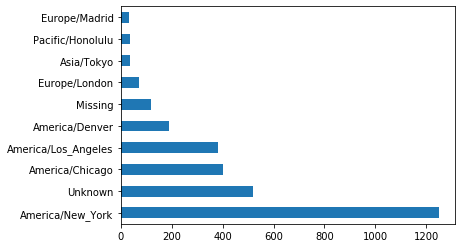

In [27]:
tz_counts[:10].plot(kind='barh', rot=0)

In [33]:
# frame['a'][1]
# frame['a'][50]
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [50]:
results = Series([x.split()[0] for x in frame.a.dropna()])
# results[:5]
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [20]:
from pandas import DataFrame,Series
import pandas as pn
from collections import Counter
import json
path ='E:\Python\WorkPlace\data.txt' 
records = [json.loads(line) for line in open(path)] 
frame = DataFrame(records)
cframe = frame[frame.a.notnull()]
# print(cframe['a'].str.contains('Windows'))
# operating_system = cframe.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
# by_tz_os = cframe.groupby(['tz', operating_system]) 
# operating_system[:5] 
# for os_frame in cframe

ValueError: For argument "inplace" expected type bool, received type str.